# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a PDF.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `local_grader.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [35]:
import re

import matplotlib.pyplot
import numpy
import pandas
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
from scipy import stats
from pandas.api import types as pdtypes

# Modify this to point to your data.
unique_data = pandas.read_csv('acrichmo_data.txt', sep = "\t")
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,col_12,col_13
0,2,1537 N,0.7578,Michael,"FOOTBALL, GOLF",716,-0.0151,1446,0.8405,1444,COMPUTER SCIENCE,25,677,0.9256,885.0
1,2,518 N,1.2003,Lise,"boxing, football",780,0.3967,880,1.369,-139,Data Science,570,913,1.489,307.0
2,0,724 N,1.0619,Chris,football,267,0.7153,561,0.6426,1046,Statistics,54,-39,0.1818,207.0
3,0,1291 N,1.4643,Chris,"ice hockey, volleyball",518,0.323,242,0.9245,1609,Electrical Engineering,959,309,0.1943,-46.0
4,2,790 N,0.9887,Michael,tennis,829,0.5133,1554,1.278,229,Technology and Information Management,-44,652,0.7874,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2,218 N,1.5058,inan,"football, boxing",606,0.7607,779,0.7669,1084,Computer Science,926,617,0.606,551.0
954,2,12 N,0.4912,Inan,"football, golf",1480,0.8271,351,0.1891,1025,Computer Science,554,158,1.0073,712.0
955,2,667 N,1.0811,Michael,"golf, football",1054,0.5495,NaN,0.8281,439,Games and Playable Media,-87,454,0.1598,263.0
956,3,1559 N,0.9588,Fabrice,"volleyball, track & field, badminton, ice hockey",815,0.3811,NaN,0.5632,307,NaN,1069,393,0.064,686.0


Don't forget to checkout the column information.

In [2]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   958 non-null    int64  
 1   col_00  947 non-null    object 
 2   col_01  947 non-null    object 
 3   col_02  950 non-null    object 
 4   col_03  950 non-null    object 
 5   col_04  953 non-null    object 
 6   col_05  950 non-null    object 
 7   col_06  942 non-null    object 
 8   col_07  950 non-null    object 
 9   col_08  948 non-null    object 
 10  col_09  952 non-null    object 
 11  col_10  944 non-null    object 
 12  col_11  946 non-null    object 
 13  col_12  955 non-null    object 
 14  col_13  949 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 112.4+ KB


And any numeric information.

In [3]:
unique_data.describe()

,label,col_13
count,958.000000,949.000000
mean,1.505219,652.127503
std,1.123267,518.891125
min,0.000000,-961.000000
25%,0.000000,278.000000
50%,2.000000,670.000000
75%,3.000000,990.000000
max,3.000000,2373.000000


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

<h4 style="color: darkorange; font-size: x-large";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [4]:
def extract_numbers(frame, ignore_columns):
    if ignore_columns is None:
        ignore_columns = []
    FLOAT_REGEX = re.compile(r'(-?\d+\.\d+)')
    INT_REGEX = re.compile(r'(-?\d+)')

    for column in frame.columns:
        if column in ignore_columns:
            continue
        for index, elem in frame[column].items():
            new_elem = re.search(FLOAT_REGEX, str(elem))

            if new_elem is not None:
                elem_to_place = float(new_elem.group())
                frame.loc[index, column] = elem_to_place
            else:
                new_elem = re.search(INT_REGEX, str(elem))
                if new_elem is not None:
                    elem_to_place = int(new_elem.group())
                    frame.loc[index, column] = elem_to_place
                else:
                    frame.loc[index, column] = numpy.nan

    return frame


def guess_types(frame):
    for column in frame.columns:
        string_amnt = 0
        float_amnt = 0
        for index, elem in frame[column].items():
            if pandas.isna(elem):
                float_amnt += 1
                continue
            try:
                curr_elem = float(elem)
            except ValueError:
                string_amnt += 1
                break
            if not curr_elem.is_integer():
                float_amnt += 1
        if string_amnt > 0:
            frame[column] = frame[column].astype(str)
        elif float_amnt > 0:
            frame[column] = frame[column].astype("float64")
        else:
            frame[column] = frame[column].astype("int64")

    return frame


# Turned out to be a dumb idea, many duplicates of names leads me to believe I shouldn't do this
def combine_people(frame, name_col):
    output_rows = []
    # ensure we iterate the name column as a Series
    names = frame[name_col].astype(object)

    # build mapping from normalized name -> list of index labels
    associated = {}
    for idx, val in names.items():  # Series.items() yields (index, value) pairs.
        if pandas.isna(val):
            continue
        s = str(val).strip().lower()
        associated.setdefault(s, []).append(idx)
        frame.at[idx, name_col] = s

    # combine groups
    for name, idx_list in associated.items():
        if not idx_list:
            continue
        row = {}
        for col in frame.columns:
            if col == name_col:
                row[col] = name
                continue
            selected = frame.loc[idx_list, col]
            if pdtypes.is_numeric_dtype(selected):
                # average numeric values (skip NaNs)
                row[col] = selected.astype(float).mean()
            else:
                # join as strings; remove NaNs and duplicates if desired
                strs = selected.dropna().astype(str).unique()
                row[col] = " (".join([", ".join(strs)]) if len(strs) else ""
        output_rows.append(row)

    return pandas.DataFrame(output_rows)


def make_frame_lowercase(frame):
    for column in frame.columns:
        if pdtypes.is_numeric_dtype(frame[column]):
            continue
        else:
            frame[column] = frame[column].str.lower()
    return frame


# will add the column or skip that if it already exists, will also add one at the specified index
def add_column(frame, column_name, index):
    if column_name not in frame.columns:
        frame[column_name] = 0
    frame.loc[index, column_name] += 1


def one_hot_encode(frame, prefix, columns):
    output_frame = frame.copy(deep=True)
    for ind, column in enumerate(columns):
        for index, elem in output_frame[column].items():
            if pandas.isna(elem):
                continue
            tokens = re.findall(r'[^,]+', elem)
            lc_tokens = [token.lower() for token in tokens]
            for token in lc_tokens:
                stripped_token = token.strip()
                new_col_name = prefix[ind] + ':' + stripped_token
                add_column(output_frame, new_col_name, index)
        output_frame.pop(column)
    return output_frame


def clean_data(frame):
    ignore_columns = ['col_02', 'col_03', 'col_09']
    frame = extract_numbers(frame, ignore_columns)
    guess_types(frame)

    frame = make_frame_lowercase(frame)
    return frame


unique_data = clean_data(unique_data)
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09,col_10,col_11,col_12,col_13
0,2,1537.0,0.7578,michael,"football, golf",716.0,-0.0151,1446.0,0.8405,1444.0,computer science,25.0,677.0,0.9256,885.0
1,2,518.0,1.2003,lise,"boxing, football",780.0,0.3967,880.0,1.3690,-139.0,data science,570.0,913.0,1.4890,307.0
2,0,724.0,1.0619,chris,football,267.0,0.7153,561.0,0.6426,1046.0,statistics,54.0,-39.0,0.1818,207.0
3,0,1291.0,1.4643,chris,"ice hockey, volleyball",518.0,0.3230,242.0,0.9245,1609.0,electrical engineering,959.0,309.0,0.1943,-46.0
4,2,790.0,0.9887,michael,tennis,829.0,0.5133,1554.0,1.2780,229.0,technology and information management,-44.0,652.0,0.7874,618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2,218.0,1.5058,inan,"football, boxing",606.0,0.7607,779.0,0.7669,1084.0,computer science,926.0,617.0,0.6060,551.0
954,2,12.0,0.4912,inan,"football, golf",1480.0,0.8271,351.0,0.1891,1025.0,computer science,554.0,158.0,1.0073,712.0
955,2,667.0,1.0811,michael,"golf, football",1054.0,0.5495,NaN,0.8281,439.0,games and playable media,-87.0,454.0,0.1598,263.0
956,3,1559.0,0.9588,fabrice,"volleyball, track & field, badminton, ice hockey",815.0,0.3811,NaN,0.5632,307.0,nan,1069.0,393.0,0.0640,686.0


Now we should also be able to view all the numeric columns.

In [5]:
unique_data.describe()

,label,col_00,col_01,col_04,col_05,col_06,col_07,col_08,col_10,col_11,col_12,col_13
count,958.000000,945.000000,945.000000,950.000000,949.000000,939.000000,947.000000,944.000000,942.000000,944.000000,953.000000,949.000000
mean,1.505219,784.557672,0.685145,512.956842,0.544507,719.732694,0.809548,584.518008,546.582803,599.475636,0.761359,652.127503
std,1.123267,513.995986,0.503201,528.703846,0.443368,528.268318,0.506771,509.234080,477.309958,373.100616,0.518925,518.891125
min,0.000000,-638.000000,-0.745700,-1117.000000,-0.893000,-914.000000,-1.251000,-930.000000,-940.000000,-652.000000,-0.887500,-961.000000
25%,0.000000,429.000000,0.350100,157.250000,0.260000,341.500000,0.481200,228.000000,231.750000,358.750000,0.404200,278.000000
50%,2.000000,790.000000,0.689500,503.000000,0.542200,740.000000,0.816700,594.500000,551.000000,614.500000,0.794000,670.000000
75%,3.000000,1161.000000,1.042000,877.750000,0.832100,1096.000000,1.140350,959.000000,867.500000,859.000000,1.101200,990.000000
max,3.000000,2149.000000,1.978300,2263.000000,2.148100,2052.000000,2.550200,1989.000000,1809.000000,1652.000000,2.554500,2373.000000


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

0.9686847599164927


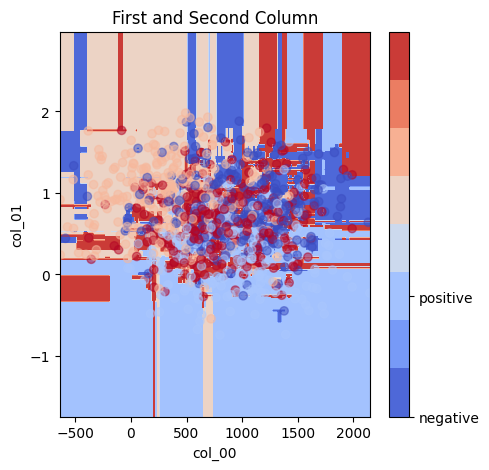

In [6]:
FIGURE_SIZE = 5
FIGURE_RESOLUTION = 500
FIGURE_COLORMAP = 'coolwarm'

def visualize_decision_boundary(classif, features, labels, title = None):
    """
    Visualize the decision boundary of a trained binary classifier
    using the FIRST TWO columns of the passed in features.
    """

    figure, axis = matplotlib.pyplot.subplots(1, 1, figsize = (FIGURE_SIZE, FIGURE_SIZE))
    axis.set_title(title)

    # Draw the decision boundary.
    decision_boundary = sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        classif, features,
        response_method = "predict", ax = axis,
        xlabel = features.columns[0], ylabel = features.columns[1],
        cmap = FIGURE_COLORMAP, grid_resolution = FIGURE_RESOLUTION
    )

    # Also display the data points.
    axis.scatter(
        features[features.columns[0]], features[features.columns[1]],
        c = labels, cmap = FIGURE_COLORMAP, alpha = 0.5,
    )

    # Add a legend for the colors.
    colorbar = figure.colorbar(decision_boundary.surface_, ax = axis, ticks = [0, 1])
    colorbar.ax.set_yticklabels(["negative", "positive"])

    return axis

def fit_and_visualize_decision_boundary(classif, features, labels, title = None):
    classif.fit(features, labels)
    visualize_decision_boundary(classif, features, labels, title = title)
    return classif.score(features, labels)

classifier = sklearn.ensemble.BaggingClassifier()

label_and_first = unique_data[['label', 'col_00']]
first_and_second = unique_data[['col_00', 'col_01']]
first_and_fourth = unique_data[['col_00', 'col_04']]

accuracy = fit_and_visualize_decision_boundary(classifier,
                                               first_and_second,
                                               unique_data['label'],
                                               'First and Second Column')
print(accuracy)

# large_columns = unique_data[['col_00', 'col_04', 'col_06',
#                              'col_08', 'col_10', 'col_11', 'col_13']]
# small_columns = unique_data[['col_01', 'col_05', 'col_07', 'col_12']]
#
# large_columns.plot.box(title = "Unique Data Distribution Large Columns")
# matplotlib.pyplot.show()
#
# small_columns.plot.box(title = "Unique Data Distribution Small Columns")
# matplotlib.pyplot.show()
#
# unique_data.plot.scatter(x = "col_00", y = "label", title = "Col_00 Relation to Labels")
# matplotlib.pyplot.show()
#
# unique_data.plot.scatter(x = "col_01", y = "label", title = "Col_01 Relation to Labels")
# matplotlib.pyplot.show()

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [32]:
def create_classifiers():
    return [sklearn.ensemble.ExtraTreesClassifier(),
            sklearn.ensemble.RandomForestClassifier(),
            sklearn.ensemble.HistGradientBoostingClassifier()]

my_classifiers = create_classifiers()
my_classifiers

[ExtraTreesClassifier(),
 RandomForestClassifier(),
 HistGradientBoostingClassifier()]

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `label` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

In [34]:
# one hot encode so we can work with our text columns as well
unique_data_features = one_hot_encode(unique_data,
                                      ["name", "sport", "major"],
                                      ['col_02', 'col_03', 'col_09'])


def cross_fold_validation(classif, frame, folds):
    features = frame.copy(deep=True)
    labels = frame['label']
    features.pop('label')

    skf = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=False)
    fold_scores = []

    for train_idx, val_idx in skf.split(features, labels):
        X_train = features.iloc[train_idx]
        y_train = labels.iloc[train_idx]
        X_val = features.iloc[val_idx]
        y_val = labels.iloc[val_idx]

        classif.fit(X_train, y_train)
        preds = classif.predict(X_val)
        fold_scores.append(sklearn.metrics.accuracy_score(y_val, preds))

    return fold_scores


my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data_features, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))

Classifier: ExtraTreesClassifier, Accuracy: [0.9739583333333334, 0.9375, 0.953125, 0.9790575916230366, 0.9319371727748691].
Classifier: RandomForestClassifier, Accuracy: [0.9947916666666666, 0.9427083333333334, 0.9791666666666666, 1.0, 0.9476439790575916].
Classifier: HistGradientBoostingClassifier, Accuracy: [1.0, 0.9791666666666666, 0.9895833333333334, 0.9947643979057592, 0.9633507853403142].


<h4 style="color: darkorange; font-size: x-large";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [40]:
def significance_test(a_values, b_values, p_value):
    ttest_result = stats.ttest_ind(a_values, b_values)
    if ttest_result.pvalue < p_value:
        return True
    return False

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

ExtraTreesClassifier vs RandomForestClassifier: False
ExtraTreesClassifier vs HistGradientBoostingClassifier: True
RandomForestClassifier vs HistGradientBoostingClassifier: False


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table needs a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should be fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```

# Part XC: Extra Credit

So far you have used a synthetic dataset that was created just for you.
But, data science is always more interesting when you are dealing with actual data from the real world.
Therefore, you will have an opportunity for extra credit on this assignment using real-world data.

For extra credit, repeat the **written tasks** of Parts 0 through 4 with an additional dataset that you find yourself.
For the written portion of the extra credit for Part 0, include information about where you got the data and what the data represents.
You may choose any dataset that represents real data (i.e., is **not** synthetic or generated)
and is **not** [pre-packaged in scikit-learn](https://scikit-learn.org/stable/datasets.html).

Below are some of the many places you can start looking for datasets:
 - [Kaggle](https://www.kaggle.com/datasets) -- Kaggle is a website focused around machine learning competitions,
       where people compete to see who can get the best results on a dataset.
       It is very popular in the machine learning community and has thousands of datasets with descriptions.
       Make sure to read the dataset's description, as Kaggle also has synthetic datasets.
 - [data.gov](https://data.gov/) -- A portal for data from the US government.
        The US government has a lot of data, and much of it has to be available to the public by law.
        This portal contains some of the more organized data from several different government agencies.
        In general, the government has A LOT of interesting data.
        It may not always be clean (remember the CIA factbook), but it is interesting and available.
        All data here should be real-world, but make sure to read the description to verify.
 - [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) -- UC Irvine has their own data repository with a few hundred datasets on many different topics.
        Make sure to read the dataset's description, as UCI also has synthetic datasets.
 - [WHO's Global Health Observatory](https://apps.who.int/gho/data/node.home) -- The World Health Organization keeps track of many different health-related statistics for most of the countries in the world.
        All data here should be real-world, but make sure to read the description to verify.
 - [Google's Dataset Search](https://datasetsearch.research.google.com/) -- Google indexes many datasets that can be searched here.

You can even create a dataset from scratch if you find some data you like that is not already organized into a specific dataset.
The only real distinction between "data" and a "dataset" is that a dataset is organized and finite (has a fixed size).

Create a new section in your written report for this extra credit and include all the written tasks for the extra credit there.
Each written task/section that you complete for your new dataset is eligible for extra credit (so you can still receive some extra credit even if you do not complete all parts).
There is no need to submit any code for the extra credit.
If you created a new dataset, include the dataset or links to it with your submission.